In [422]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
import scipy
from scipy import stats 
import IS as isfn
import network_mod as netfn

sns.reset_orig()
#plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Load Empirical data

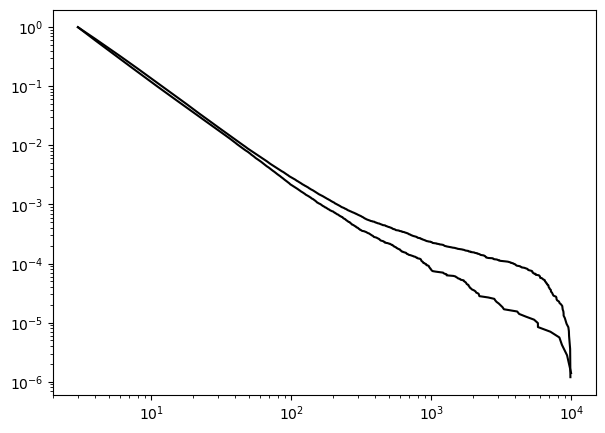

In [4]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i][bln_distlist[i] <= 10000])
    p20_vec = np.append(p20_vec, p20_distlist[i][p20_distlist[i] <= 10000])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')

plt.show()

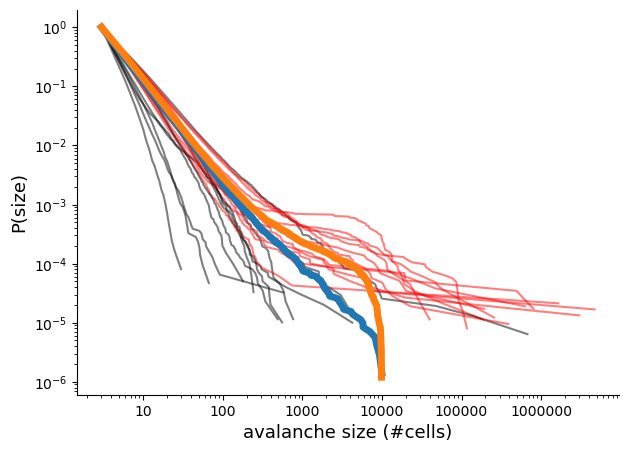

In [5]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))

import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(bln_distlist)):
    sns.reset_orig()
    avdistcut = np.load(blnlist[i])[0]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = 'k')
    avdistcut = np.load(p20list[i])[0]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = 'red')
    
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =5 , markersize = 1, alpha = 1)
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =5 , markersize = 1, alpha = 1)

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Build network
* unconnected nodes from real fish structure
* k-means on all fish warped to same space: k = mean number of cells
* n cells - distance between cells in space

In [ ]:
#Plot all registered cells
fig,axarr = plt.subplots(figsize = (10,10))
comb_coords = np.load(reglist[0])
for i in range(len(reglist)-1):
    comb_coords = np.row_stack((comb_coords,np.load(reglist[i+1])))

spatial_conversion = [.5, .5, 15]
space_coord = np.multiply(comb_coords, spatial_conversion)
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'black' , alpha = 0.03)
plt.show()
#How many cell clusters - mean of all cells used in av calculation
sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Remove unwanted coords for plotting
x,y = 140, 240 
coordvec = []
for i in range(5):
    x  = x+10
    y = y-10
    xcoord = np.where(space_coord[:,0] > x)[0]
    ycoord = np.where((space_coord[:,1] > y))[0]
    coordvec = np.append(coordvec, np.intersect1d(xcoord,ycoord))
    
remaining = np.where(space_coord[:,1]< 5)
coordvec = np.append(coordvec, remaining)
coordvec = np.unique(coordvec.astype(int))

new_space_coord = np.zeros((space_coord.shape[0] - coordvec.shape[0], 3))
count=0
for i in range(space_coord.shape[0]):
    if i in coordvec:
        continue
    else:
        new_space_coord[count] = space_coord[i]
        count+=1


In [ ]:
#PLot outlier removal
fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
axarr.scatter(space_coord[:,0][coordvec], space_coord[:,1][coordvec], s = 4, color = 'red' , alpha = 0.1)
plt.show()

fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(new_space_coord[:,0], new_space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
plt.show()

sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Kmeans clustering
from sklearn.cluster import KMeans
kmeans   = KMeans(n_clusters=n_clust, random_state=0).fit(new_space_coord)  #perform k means on all cells
klab =  kmeans.labels_
space_coord_labels = np.column_stack((new_space_coord, klab))
np.save(savepath + 'klabels-spaced-coords.npy', space_coord_labels)

In [ ]:
#Average cells by labels to make new cluster
coords = np.load(net[0])
unq = np.unique(coords[:,3]).astype(int)
node_coord = np.zeros((unq.shape[0], 3))
for i in unq:
    data = coords[np.where(coords[:,3] == unq[i])][:,:3]
    node_coord[i] = [sum(x)/len(x) for x in zip(*data)]
np.save(savepath + 'knodes-coords.npy', node_coord)

In [ ]:
fig,axarr = plt.subplots(figsize = (10,10))
coords = np.load(net[0])
axarr.scatter(coords[:,0], coords[:,1], s = 4, color = 'grey' , alpha = 0.05)
axarr.scatter(node_coord[:,0], node_coord[:,1], s = 4, color = 'red' , alpha = 0.3)
plt.show()

# Connect network

## Network types

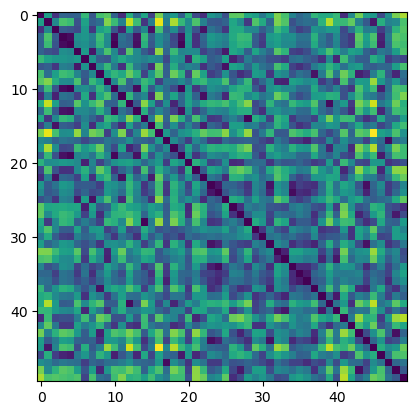

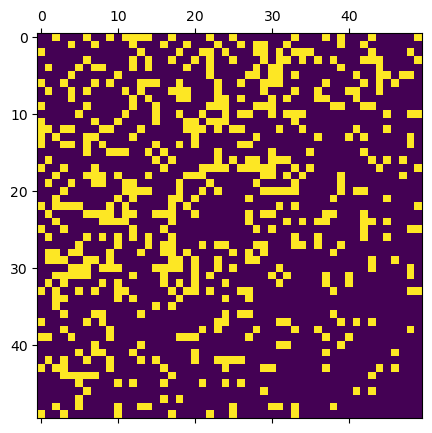

In [5]:
from sklearn.metrics.pairwise import euclidean_distances

#Watts Strogatz - small world network
Nnodes    = 50
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
p = 0.9
k = 10
plt.imshow(dist)
plt.show()

ws = netfn.ws_netsim(dist).net_generate(k, p, 'undirected').A
fig, axarr = plt.subplots(figsize = (5,5))                   
axarr.matshow(ws)
plt.show()



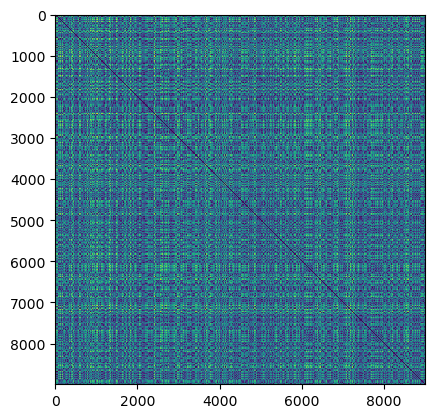

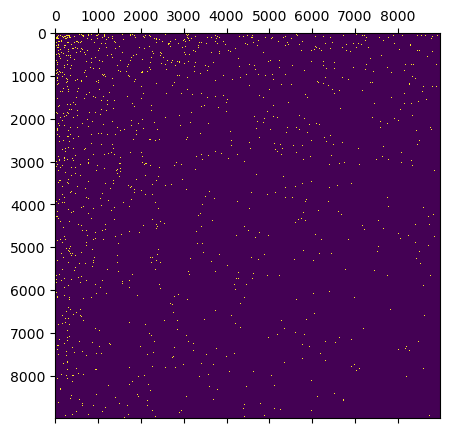

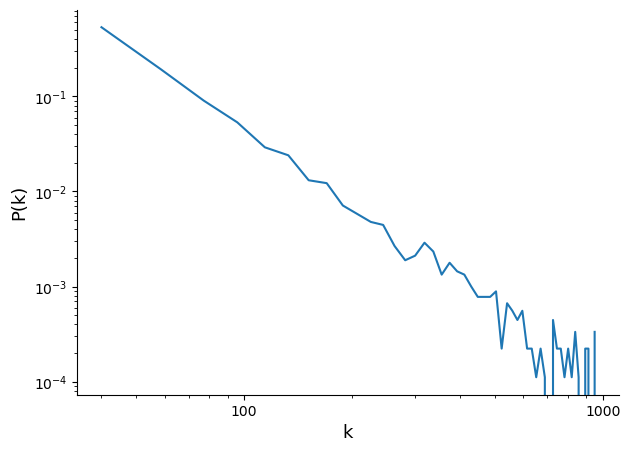

In [413]:
#Barabasi albert - scale free
Nnodes    = nodes.shape[0]
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
k = 40
plt.imshow(dist)
plt.show()

ba = netfn.ba_netsim(dist).net_generate(k, 'directed').A
fig, axarr = plt.subplots(figsize = (5,5))                   
axarr.matshow(ba)
plt.show()

#Degree distribution
import matplotlib 
fig, axarr = plt.subplots(figsize = (7,5))
avdistcut = np.sum(ba, axis = 1)
hist = np.histogram(avdistcut, bins = 50)
xaxis = hist[1]
yaxis = hist[0]/np.sum(hist[0])
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(k)', size = '13')
axarr.set_xlabel('k', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Select parameters
* k = edge density, number of nearest neighbours to connect to
* s = edge weight (probability of firing), scaled for distance
* c = clustering coefficient


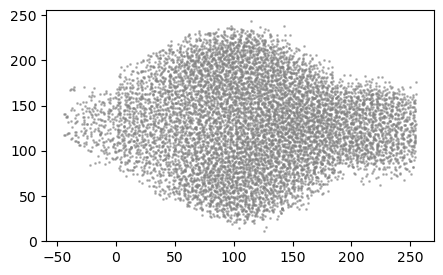

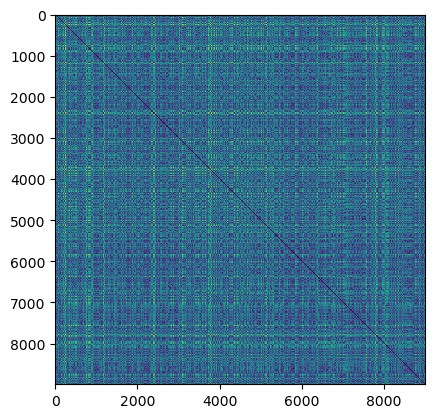

In [460]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)

node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (5,3))
nodes = np.load(node[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 1, color = 'grey' , alpha = 0.5)
plt.show()

dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()

In [ ]:
#Single parameter for scaling and relaxing
# Simple sigmoid function to 'soften' the exponential
#-------------------------------------------------------------------------------
def sig(x):
  return 1 / (1+np.exp(-x))

# Conversion from distance to edge weights, scaled (itself exponentially) by s
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, s):
  edgeweights = np.exp(s/5)*sig(np.exp(-soften/np.exp(s)*distance))/divisor
  return edgeweights

#S parameters
Nsteps  = 10
divisor = 5
soften = 0.07
s_vals   = np.array(np.linspace(0, 4, Nsteps)).tolist()

#Plot each s value
fig, ax = plt.subplots(1, figsize=(6,6))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)
for s in range(len(s_vals)):
  ax.plot(distance, dist2edge(distance, divisor, s_vals[s]), c=colors[s])
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

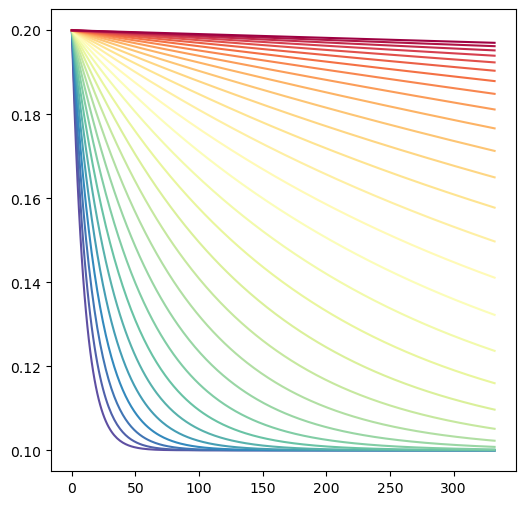

In [461]:
#Two parameters - one for scaling (s) + one for relaxing (r)
# Conversion from distance to edge weights, scaled (itself exponentially) by s
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, r,s):
    edgeweights = (s + np.exp(-soften/np.exp(r)*distance))/divisor
    return edgeweights

#S parameters
Nsteps  = 30
divisor = 10
soften = 0.1
s = 1
r_vals   = np.array(np.linspace(0, 7, Nsteps)).tolist()

#Plot each s value
fig, ax = plt.subplots(1, figsize=(6,6))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)
for r in range(len(r_vals)):
    ax.plot(distance, dist2edge(distance, divisor, r_vals[r], s), c=colors[r])
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

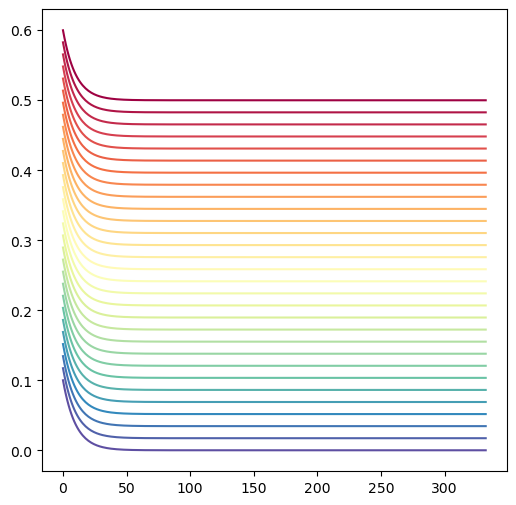

In [462]:
#Two parameters - one for scaling (s) + one for relaxing (r)
# Conversion from distance to edge weights, scaled (itself exponentially) by s
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, r,s):
    edgeweights = (s + np.exp(-soften/np.exp(r)*distance))/divisor
    return edgeweights

#S parameters
Nsteps  = 30
divisor = 10
soften = 0.1
r = 0
s_vals   = np.array(np.linspace(0, 5, Nsteps)).tolist()

#Plot each s value
fig, ax = plt.subplots(1, figsize=(6,6))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)
for s in range(len(s_vals)):
    ax.plot(distance, dist2edge(distance, divisor, r, s_vals[s]), c=colors[s])
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

In [5]:
#Calculate number of simulatons to do - to have 95% chance of generating maximum avalanche
def num_sims(empirical, cutoff):
    import matplotlib.pyplot as plt
    import math
    fig, axarr = plt.subplots(figsize = (7,5))
    hist = axarr.hist(empirical, bins = 100000, density = True, histtype = 'step', cumulative = -1)
    p = 1-(10**(np.log10(hist[0])[np.where(np.log10(hist[1]) > np.log10(cutoff))[0][0]])) #probability of getting avalanches of size cutoff or smaller
    number = 0.05 
    base = p
    exponent = int(math.log(number, base)) #number of simulations as the power to which p is raised to get 95% probability 
    return(exponent)

#Simulation parameters
#======================
cutoff = 1000
n_sims= num_sims(bln_vec, cutoff)
n_sims

29156

In [296]:
#Build nearest neighbour matrix for model
#nnb = crfn.neighbour_r(nodes, 0.16, 6000, [1, 1, 1])
#np.save('net_model_nnb.npy', nnb)

experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
net_nnb = np.load(sorted(glob.glob('*net_model_nnb*'))[0])
net_nnb

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Add dynamics
* network of LIF neurons

In [467]:
import brian2 as b2
from random import sample
from numpy import random

## LIF PARAMETERS
#Network dynamics
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

#Bin data function
def bin_data(spikes, N, sim_time):
    bin_dat = np.zeros((N, sim_time))
    for i in range(N):
        bin_dat[i][np.unique((np.asarray(spikes[i])*1000).astype(int))] = 1
    return(bin_dat)


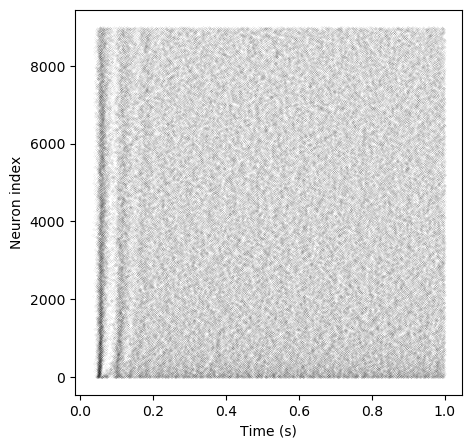

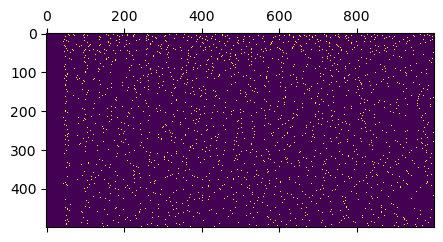

In [468]:
#Parameters
s = 2 #edge weight
r = 0 #relax parameter
k = 5 #edge number
v_th = 20 #spike threshold


sim_time=1000 #ms - 10 time steps per ms
b2.start_scope()


# define dynamics for each cell
lif ="""
    dv/dt = -(v-v_rest) / tau_l : 1 """
net_dyn = b2.NeuronGroup(
    N, model=lif,
    threshold="v>v_th", reset="v = v_rest",
    method="euler")
net_dyn.v = v_rest #set starting value for voltage

p_input = b2.PoissonInput(net_dyn, "v", N_e,lam, w_e)

#Network connectivity + weights

curr = netfn.ba_netsim(dist).adjmat_generate(k, s, r, divisor, soften, 'directed')
A = curr.A
W = curr.adj_mat

#Build synapses
net_syn = b2.Synapses(net_dyn, net_dyn, 'w:1', on_pre="v+=w", delay=t_syn_del)
rows, cols = np.nonzero(A)
net_syn.connect(i = rows, j = cols)
net_syn.w = W[rows, cols]

spike_monitor = b2.SpikeMonitor(net_dyn)
V = b2.StateMonitor(net_dyn, 'v', record=True)
b2.run(sim_time*b2.ms)
spikes = spike_monitor.spike_trains()
volt = np.asarray(V.v)

#Plot data
fig, axarr = plt.subplots(figsize = (5,5))
plt.plot(spike_monitor.t, spike_monitor.i, '.k', markersize = 0.05)
plt.xlabel('Time (s)')
plt.ylabel('Neuron index');
plt.show()

bind = bin_data(spikes, N, sim_time)
fig, ax = plt.subplots(figsize= (5,15))
ax.matshow(bind[:500])
plt.show()



# Find parameter ranges
* Range that captures upper + lower bound of empirical data


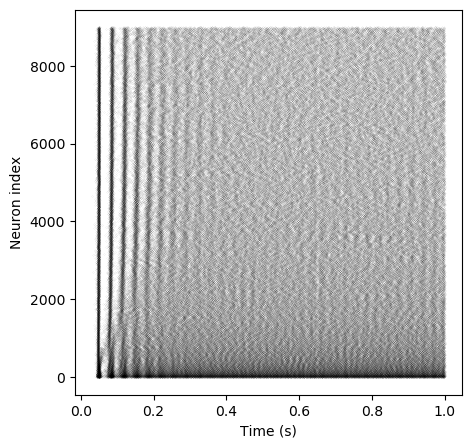

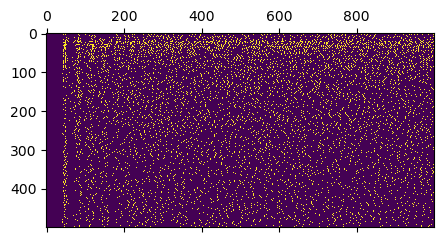

doing time step 0of1000for fish 
doing time step 100of1000for fish 
doing time step 200of1000for fish 
doing time step 300of1000for fish 
doing time step 400of1000for fish 
doing time step 500of1000for fish 
doing time step 600of1000for fish 
doing time step 700of1000for fish 
doing time step 800of1000for fish 
doing time step 900of1000for fish 


WARNING    /Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]
 [py.warnings]


<synapses.w: array([0.15080488, 0.15138784, 0.15004013, ..., 0.16688791, 0.15007687,
       0.15068083])>


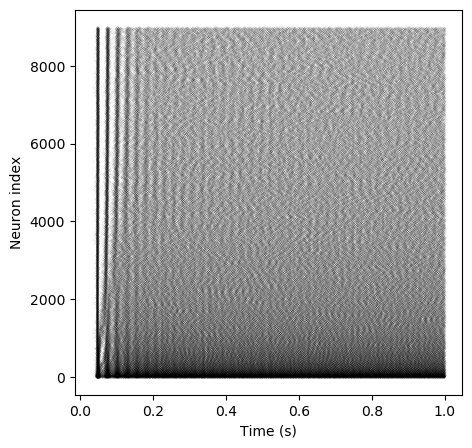

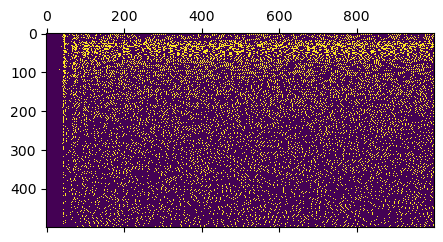

doing time step 0of1000for fish 
doing time step 100of1000for fish 
doing time step 200of1000for fish 
doing time step 300of1000for fish 
doing time step 400of1000for fish 
doing time step 500of1000for fish 
doing time step 600of1000for fish 
doing time step 700of1000for fish 
doing time step 800of1000for fish 


In [ ]:
sim_time=1000 #ms - 10 time steps per ms
b2.start_scope()

#Parameters
s = 1.5 #edge weight
r = 1 #relax parameter
v_th = 20 #spike threshold


av_vals = [20, 25, 28, 30]
av_list = list(range(len(av_vals)))
v_list = list(range(len(av_vals)))
count=0

for i in (av_vals):

    sim_time=1000 #ms - 10 time steps per ms
    b2.start_scope()

    # define dynamics for each cell
    lif ="""
        dv/dt = -(v-v_rest) / tau_l : 1 """
    net_dyn = b2.NeuronGroup(
        N, model=lif,
        threshold="v>v_th", reset="v = v_rest",
        method="euler")
    net_dyn.v = v_rest #set starting value for voltage

    p_input = b2.PoissonInput(net_dyn, "v", N_e,lam, w_e)

    #Network connectivity + weights

    curr = netfn.ba_netsim(dist).adjmat_generate(i, s, r, divisor, soften, 'directed')
    A = curr.A
    W = curr.adj_mat

    #Build synapses
    net_syn = b2.Synapses(net_dyn, net_dyn, 'w:1', on_pre="v+=w", delay=t_syn_del)
    rows, cols = np.nonzero(A)
    net_syn.connect(i = rows, j = cols)
    net_syn.w = W[rows, cols]

    spike_monitor = b2.SpikeMonitor(net_dyn)
    V = b2.StateMonitor(net_dyn, 'v', record=True)
    b2.run(sim_time*b2.ms)
    spikes = spike_monitor.spike_trains()
    v_list[count] = np.asarray(V.v)

    #Plot data
    fig, axarr = plt.subplots(figsize = (5,5))
    plt.plot(spike_monitor.t, spike_monitor.i, '.k', markersize = 0.05)
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron index');
    plt.show()

    bind = bin_data(spikes, N, sim_time)
    fig, ax = plt.subplots(figsize= (5,15))
    ax.matshow(bind[:500])
    plt.show()
    av_list[count] = crfn.avalanche_r(net_nnb, bind)
    count+=1
    print(net_syn.w)


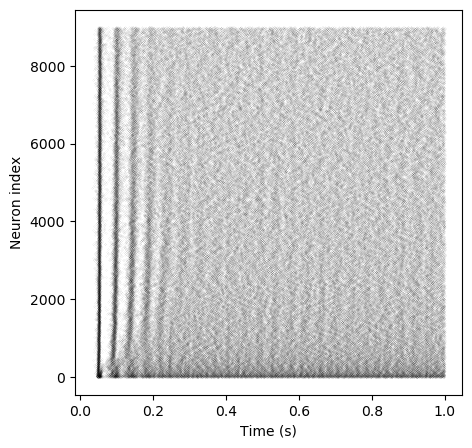

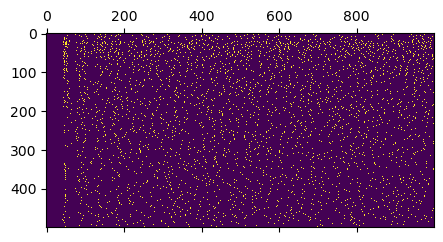

<synapses_1.w: array([0.10080488, 0.10138784, 0.10004013, ..., 0.10110514, 0.10007209,
       0.10330603])>


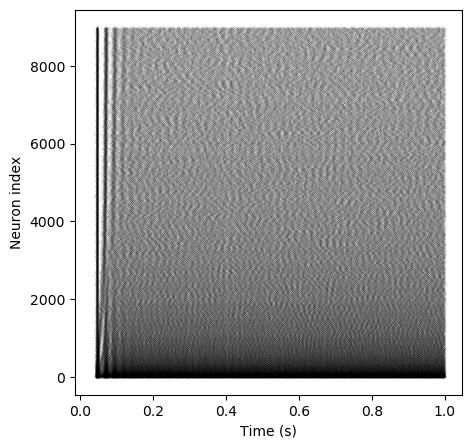

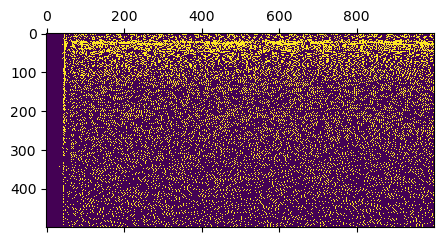

<synapses.w: array([0.20080488, 0.20138784, 0.20004013, ..., 0.2001744 , 0.20182899,
       0.20274352])>


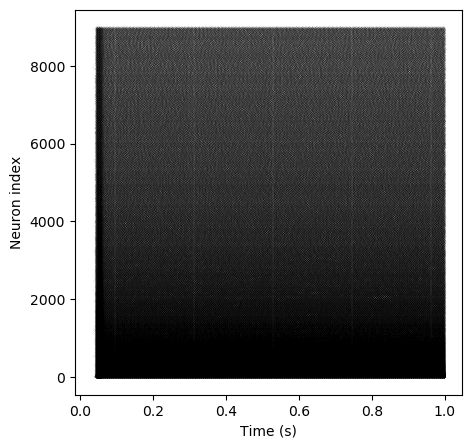

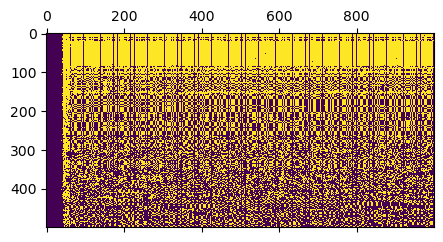

<synapses_1.w: array([0.30080488, 0.30138784, 0.30004013, ..., 0.30035883, 0.30031206,
       0.30063214])>


KeyboardInterrupt: 

In [472]:
sim_time=1000 #ms - 10 time steps per ms
b2.start_scope()

#Parameters
r = 1 #relax parameter
v_th = 20 #spike threshold
k = 20


av_vals = [1, 2, 3, 4]
av_list = list(range(len(av_vals)))
v_list = list(range(len(av_vals)))
count=0

for i in (av_vals):

    sim_time=1000 #ms - 10 time steps per ms
    b2.start_scope()

    # define dynamics for each cell
    lif ="""
        dv/dt = -(v-v_rest) / tau_l : 1 """
    net_dyn = b2.NeuronGroup(
        N, model=lif,
        threshold="v>v_th", reset="v = v_rest",
        method="euler")
    net_dyn.v = v_rest #set starting value for voltage

    p_input = b2.PoissonInput(net_dyn, "v", N_e,lam, w_e)

    #Network connectivity + weights

    curr = netfn.ba_netsim(dist).adjmat_generate(k, i, r, divisor, soften, 'directed')
    A = curr.A
    W = curr.adj_mat

    #Build synapses
    net_syn = b2.Synapses(net_dyn, net_dyn, 'w:1', on_pre="v+=w", delay=t_syn_del)
    rows, cols = np.nonzero(A)
    net_syn.connect(i = rows, j = cols)
    net_syn.w = W[rows, cols]

    spike_monitor = b2.SpikeMonitor(net_dyn)
    V = b2.StateMonitor(net_dyn, 'v', record=True)
    b2.run(sim_time*b2.ms)
    spikes = spike_monitor.spike_trains()
    v_list[count] = np.asarray(V.v)

    #Plot data
    fig, axarr = plt.subplots(figsize = (5,5))
    plt.plot(spike_monitor.t, spike_monitor.i, '.k', markersize = 0.05)
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron index');
    plt.show()

    bind = bin_data(spikes, N, sim_time)
    fig, ax = plt.subplots(figsize= (5,15))
    ax.matshow(bind[:500])
    plt.show()
    #av_list[count] = crfn.avalanche_r(net_nnb, bind)
    count+=1
    print(net_syn.w)


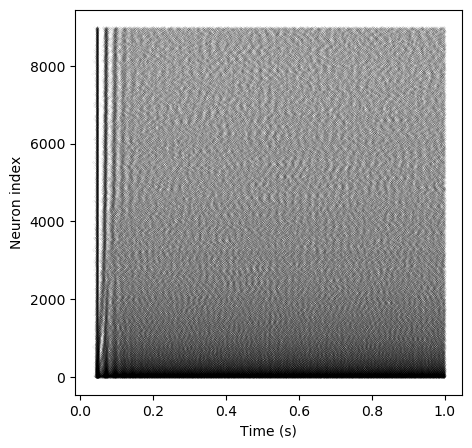

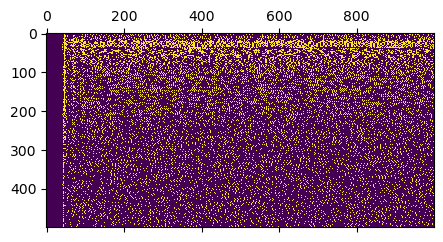

<synapses.w: array([0.2000002 , 0.20000089, 0.2       , ..., 0.20068576, 0.20010748,
       0.2000046 ])>


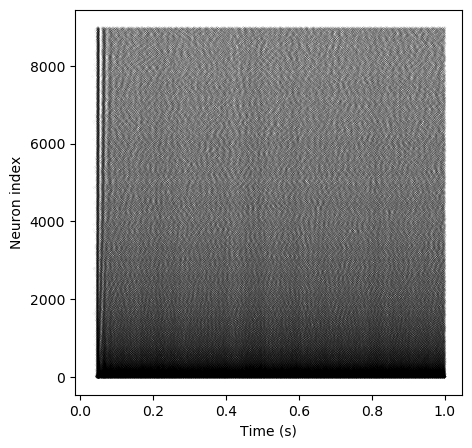

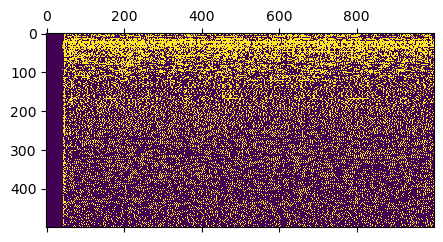

<synapses_1.w: array([0.21696528, 0.20562988, 0.21728827, ..., 0.23585262, 0.22757428,
       0.21633963])>


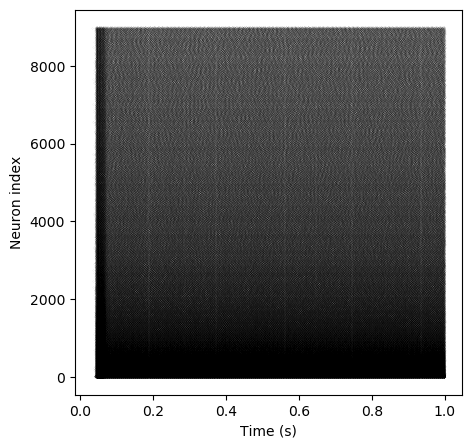

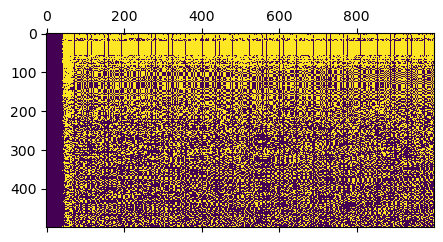

<synapses.w: array([0.2786561 , 0.28081882, 0.2677483 , ..., 0.27388451, 0.2747479 ,
       0.2744065 ])>


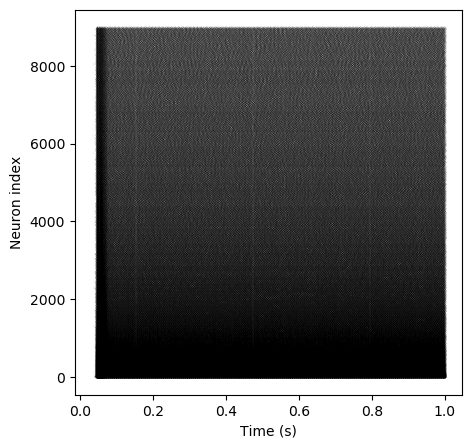

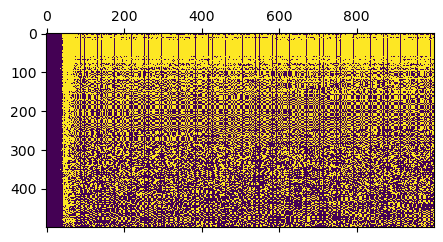

<synapses_1.w: array([0.29680302, 0.29715903, 0.29683647, ..., 0.29612496, 0.29801494,
       0.294828  ])>


In [473]:
sim_time=1000 #ms - 10 time steps per ms
b2.start_scope()

#Parameters
s = 2
v_th = 20 #spike threshold
k = 20

av_vals = [0, 2, 4, 6]
av_list = list(range(len(av_vals)))
v_list = list(range(len(av_vals)))
count=0

for i in (av_vals):

    sim_time=1000 #ms - 10 time steps per ms
    b2.start_scope()

    # define dynamics for each cell
    lif ="""
        dv/dt = -(v-v_rest) / tau_l : 1 """
    net_dyn = b2.NeuronGroup(
        N, model=lif,
        threshold="v>v_th", reset="v = v_rest",
        method="euler")
    net_dyn.v = v_rest #set starting value for voltage

    p_input = b2.PoissonInput(net_dyn, "v", N_e,lam, w_e)

    #Network connectivity + weights

    curr = netfn.ba_netsim(dist).adjmat_generate(k, s, i, divisor, soften, 'directed')
    A = curr.A
    W = curr.adj_mat

    #Build synapses
    net_syn = b2.Synapses(net_dyn, net_dyn, 'w:1', on_pre="v+=w", delay=t_syn_del)
    rows, cols = np.nonzero(A)
    net_syn.connect(i = rows, j = cols)
    net_syn.w = W[rows, cols]

    spike_monitor = b2.SpikeMonitor(net_dyn)
    V = b2.StateMonitor(net_dyn, 'v', record=True)
    b2.run(sim_time*b2.ms)
    spikes = spike_monitor.spike_trains()
    v_list[count] = np.asarray(V.v)

    #Plot data
    fig, axarr = plt.subplots(figsize = (5,5))
    plt.plot(spike_monitor.t, spike_monitor.i, '.k', markersize = 0.05)
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron index');
    plt.show()

    bind = bin_data(spikes, N, sim_time)
    fig, ax = plt.subplots(figsize= (5,15))
    ax.matshow(bind[:500])
    plt.show()
    #av_list[count] = crfn.avalanche_r(net_nnb, bind)
    count+=1
    print(net_syn.w)


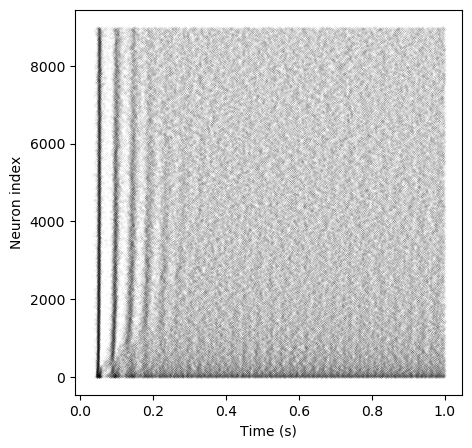

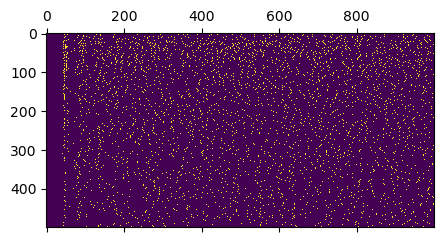

<synapses.w: array([0.10080488, 0.10138784, 0.10004013, ..., 0.11262679, 0.10035305,
       0.1023737 ])>


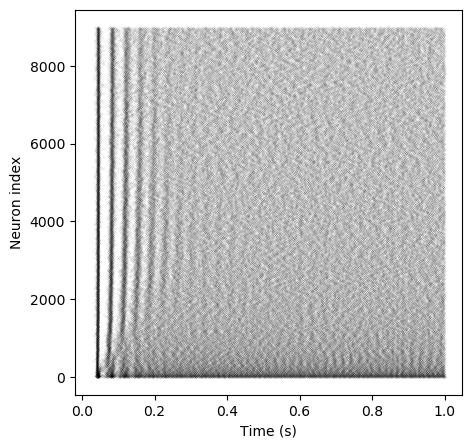

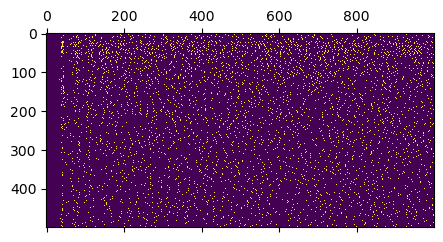

<synapses_1.w: array([0.10080488, 0.10138784, 0.10004013, ..., 0.1002419 , 0.11440308,
       0.10028248])>


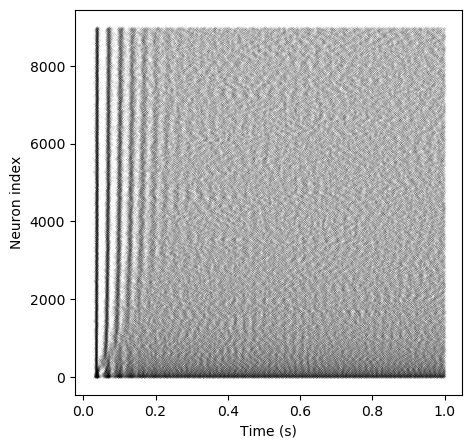

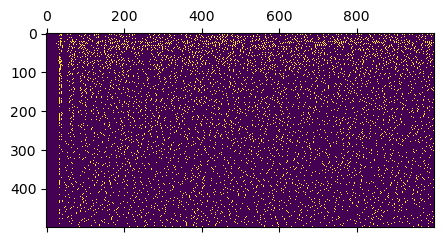

<synapses.w: array([0.10080488, 0.10138784, 0.10004013, ..., 0.10021062, 0.10253267,
       0.10140297])>


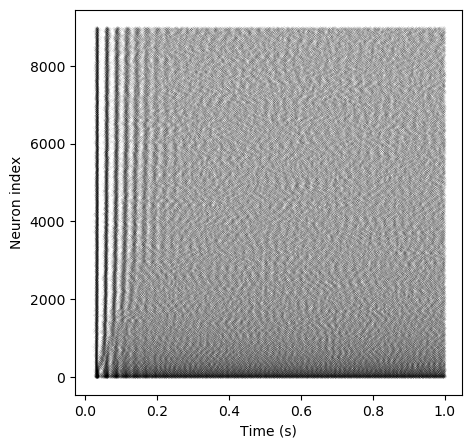

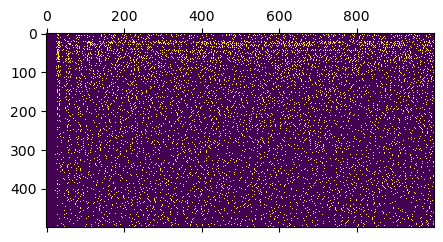

<synapses_1.w: array([0.10080488, 0.10138784, 0.10004013, ..., 0.10060934, 0.10236097,
       0.10115417])>


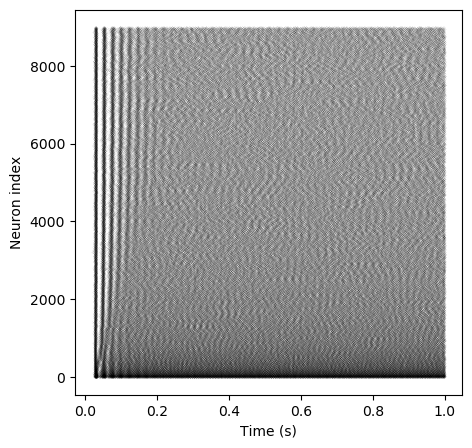

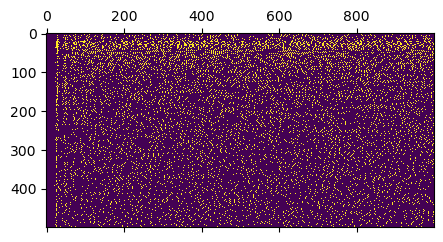

<synapses.w: array([0.10080488, 0.10138784, 0.10084722, ..., 0.10183524, 0.10545752,
       0.10451232])>


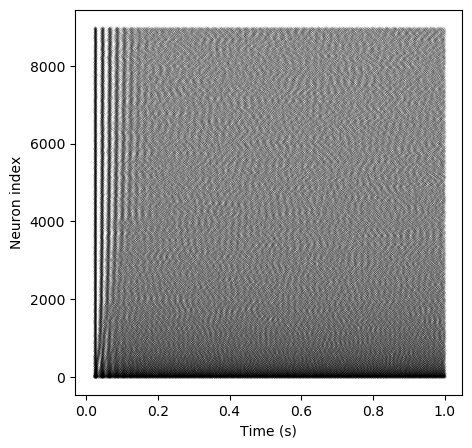

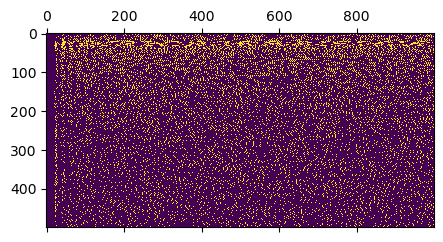

<synapses_1.w: array([0.10080488, 0.10138784, 0.10004013, ..., 0.10024582, 0.10015823,
       0.1007982 ])>


In [474]:
sim_time=1000 #ms - 10 time steps per ms
b2.start_scope()

#Parameters
r = 1 #relax parameter
k = 20
s = 1

av_vals = [20, 19, 18, 17, 16, 15]
av_list = list(range(len(av_vals)))
v_list = list(range(len(av_vals)))
count=0

for i in (av_vals):
    v_th = i
    sim_time=1000 #ms - 10 time steps per ms
    b2.start_scope()

    # define dynamics for each cell
    lif ="""
        dv/dt = -(v-v_rest) / tau_l : 1 """
    net_dyn = b2.NeuronGroup(
        N, model=lif,
        threshold="v>v_th", reset="v = v_rest",
        method="euler")
    net_dyn.v = v_rest #set starting value for voltage

    p_input = b2.PoissonInput(net_dyn, "v", N_e,lam, w_e)

    #Network connectivity + weights

    curr = netfn.ba_netsim(dist).adjmat_generate(k, s, r, divisor, soften, 'directed')
    A = curr.A
    W = curr.adj_mat

    #Build synapses
    net_syn = b2.Synapses(net_dyn, net_dyn, 'w:1', on_pre="v+=w", delay=t_syn_del)
    rows, cols = np.nonzero(A)
    net_syn.connect(i = rows, j = cols)
    net_syn.w = W[rows, cols]

    spike_monitor = b2.SpikeMonitor(net_dyn)
    V = b2.StateMonitor(net_dyn, 'v', record=True)
    b2.run(sim_time*b2.ms)
    spikes = spike_monitor.spike_trains()
    v_list[count] = np.asarray(V.v)

    #Plot data
    fig, axarr = plt.subplots(figsize = (5,5))
    plt.plot(spike_monitor.t, spike_monitor.i, '.k', markersize = 0.05)
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron index');
    plt.show()

    bind = bin_data(spikes, N, sim_time)
    fig, ax = plt.subplots(figsize= (5,15))
    ax.matshow(bind[:500])
    plt.show()
    #av_list[count] = crfn.avalanche_r(net_nnb, bind)
    count+=1
    print(net_syn.w)


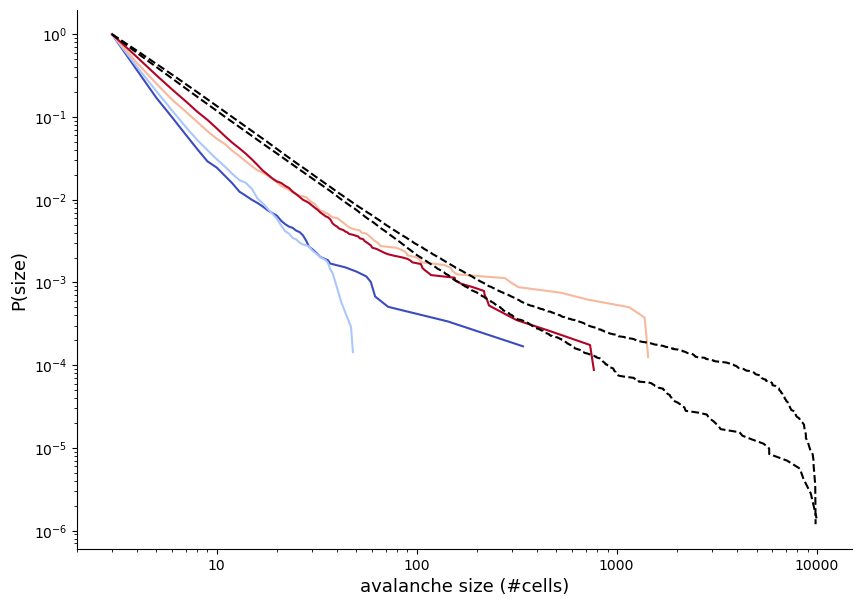

In [341]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
import matplotlib
import powerlaw

colors  = cm.coolwarm(np.linspace(0,1,len(av_list)))
fig, axarr = plt.subplots(figsize = (10,7))
sns.reset_orig()

for i in range(len(av_list)):
    avdistcut = av_list[i][0]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i]) 
    
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')


axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

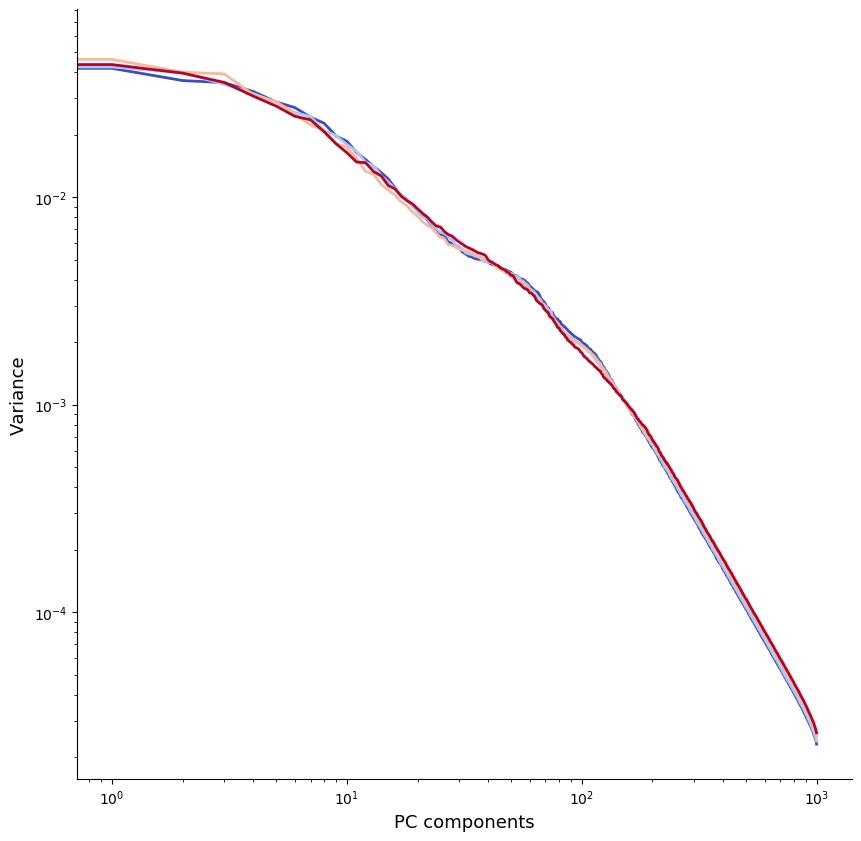

In [342]:
from sklearn import decomposition
fig, axarr = plt.subplots(figsize = (10,10))
colors  = cm.coolwarm(np.linspace(0,1,len(v_list)))
count=0
for i in v_list:
    volts = i
    comp = volts.shape[1]
    pca = decomposition.PCA(1000)
    fit= pca.fit(volts) 
    pcv = fit.explained_variance_ratio_
    
    xaxis = np.linspace(0,np.shape(pcv)[0], num = np.shape(pcv)[0]+1)
    yaxis = pcv
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[count])
    count+=1
    
#axarr.set_xlim(left = 800)    
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

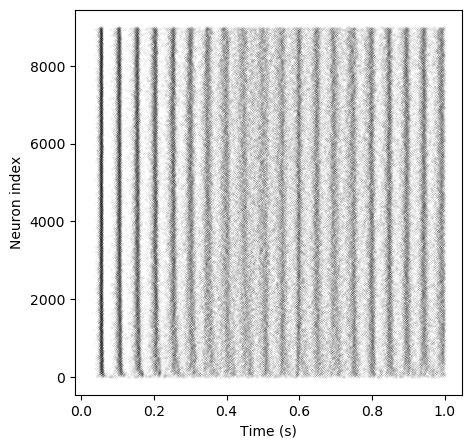

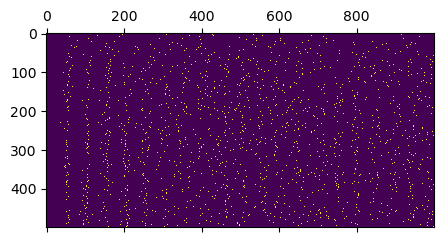

doing time step 0of1000for fish 
doing time step 100of1000for fish 
doing time step 200of1000for fish 
doing time step 300of1000for fish 
doing time step 400of1000for fish 
doing time step 500of1000for fish 
doing time step 600of1000for fish 
doing time step 700of1000for fish 
doing time step 800of1000for fish 
doing time step 900of1000for fish 


WARNING    /Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]
 [py.warnings]


<synapses_1.w: array([0.1       , 0.10000002, 0.10000142, ..., 0.10000861, 0.10000144,
       0.10000038])>


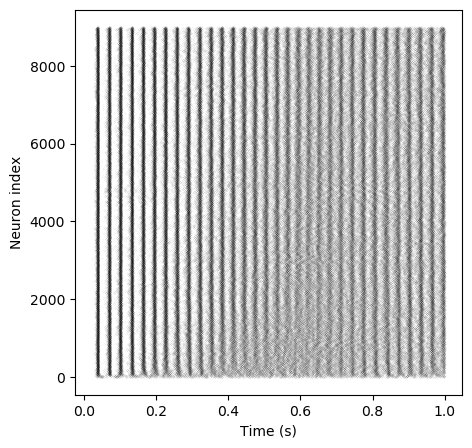

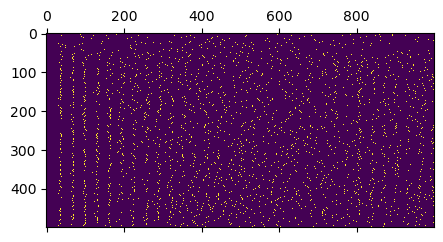

doing time step 0of1000for fish 
doing time step 100of1000for fish 
doing time step 200of1000for fish 
doing time step 300of1000for fish 
doing time step 400of1000for fish 
doing time step 500of1000for fish 
doing time step 600of1000for fish 
doing time step 700of1000for fish 
doing time step 800of1000for fish 
doing time step 900of1000for fish 


WARNING    /Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]
 [py.warnings]


<synapses_2.w: array([0.1       , 0.10000002, 0.10000142, ..., 0.10002205, 0.10000079,
       0.10000012])>


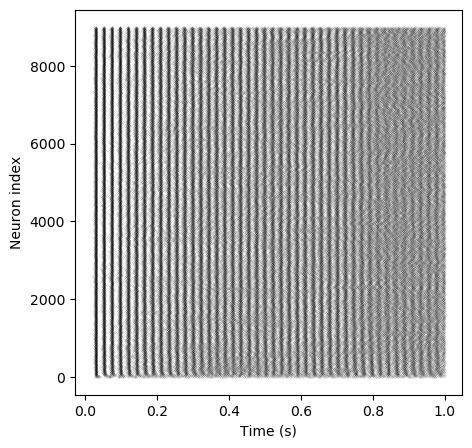

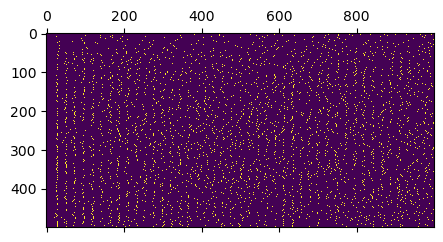

doing time step 0of1000for fish 
doing time step 100of1000for fish 
doing time step 200of1000for fish 
doing time step 300of1000for fish 
doing time step 400of1000for fish 
doing time step 500of1000for fish 
doing time step 600of1000for fish 
doing time step 700of1000for fish 
doing time step 800of1000for fish 
doing time step 900of1000for fish 


WARNING    /Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]
 [py.warnings]


<synapses_1.w: array([0.1       , 0.10000002, 0.10003827, ..., 0.10000045, 0.10000008,
       0.10003229])>


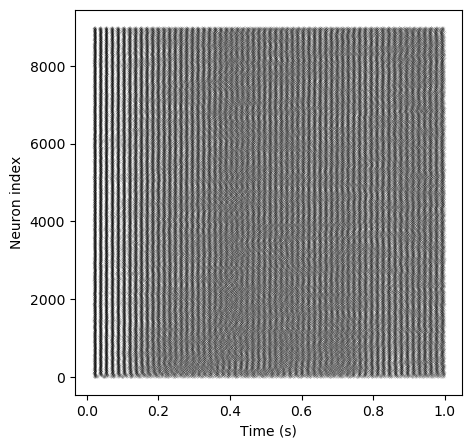

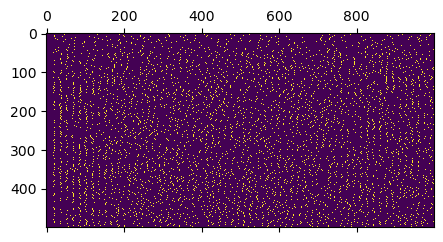

doing time step 0of1000for fish 
doing time step 100of1000for fish 
doing time step 200of1000for fish 
doing time step 300of1000for fish 
doing time step 400of1000for fish 
doing time step 500of1000for fish 
doing time step 600of1000for fish 
doing time step 700of1000for fish 
doing time step 800of1000for fish 
doing time step 900of1000for fish 


WARNING    /Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]
 [py.warnings]


<synapses_2.w: array([0.1       , 0.10000004, 0.10000059, ..., 0.10000001, 0.10000146,
       0.1000142 ])>


In [321]:
sim_time=1000 #ms - 10 time steps per ms
b2.start_scope()

#Parameters
k = 50
s = 1 

r = 0 #relax parameter

vth_vals = [20, 18, 16, 14]
vth_list = list(range(len(vth_vals)))
count=0

for i in (vth_vals):

    sim_time=1000 #ms - 10 time steps per ms
    b2.start_scope()
    
    v_th = i  
    # define dynamics for each cell
    lif ="""
        dv/dt = -(v-v_rest) / tau_l : 1 """
    net_dyn = b2.NeuronGroup(
        N, model=lif,
        threshold="v>v_th", reset="v = v_rest",
        method="euler")
    net_dyn.v = v_rest #set starting value for voltage

    p_input = b2.PoissonInput(net_dyn, "v", N_e,lam, w_e)

    #Network connectivity + weights

    curr = netfn.ba_netsim(dist).adjmat_generate(k, s, r, divisor, soften, 'directed')
    A = curr.A
    W = curr.adj_mat

    #Build synapses
    net_syn = b2.Synapses(net_dyn, net_dyn, 'w:1', on_pre="v+=w", delay=t_syn_del)
    rows, cols = np.nonzero(A)
    net_syn.connect(i = rows, j = cols)
    net_syn.w = W[rows, cols]

    spike_monitor = b2.SpikeMonitor(net_dyn)
    V = b2.StateMonitor(net_dyn, 'v', record=True)
    b2.run(sim_time*b2.ms)
    spikes = spike_monitor.spike_trains()
    volt = np.asarray(V.v)

    #Plot data
    fig, axarr = plt.subplots(figsize = (5,5))
    plt.plot(spike_monitor.t, spike_monitor.i, '.k', markersize = 0.05)
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron index');
    plt.show()

    bind = bin_data(spikes, N, sim_time)
    fig, ax = plt.subplots(figsize= (5,15))
    ax.matshow(bind[:500])
    plt.show()
    vth_list[count] = crfn.avalanche_r(net_nnb, bind)
    count+=1
    print(net_syn.w)


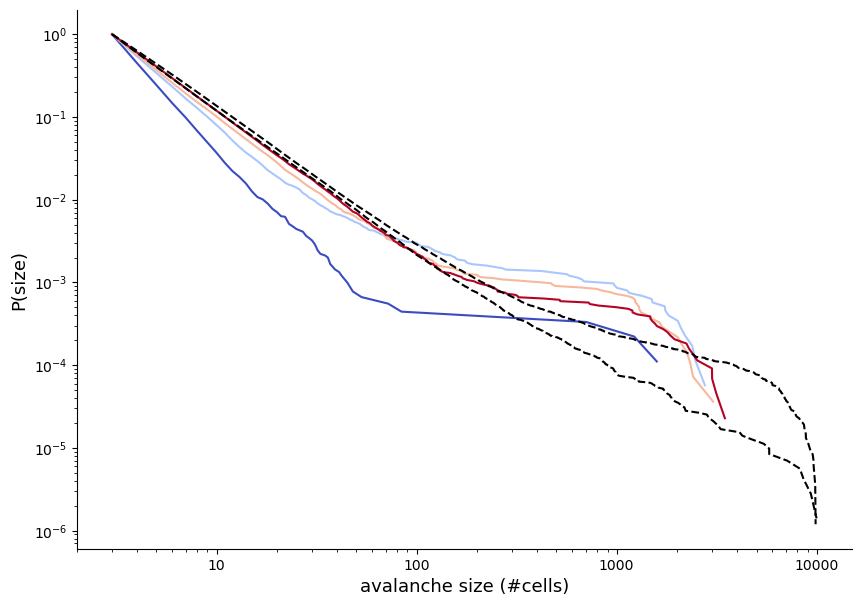

In [322]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
import matplotlib
import powerlaw

colors  = cm.coolwarm(np.linspace(0,1,len(vth_list)))
fig, axarr = plt.subplots(figsize = (10,7))
sns.reset_orig()

for i in range(len(vth_list)):
    avdistcut = vth_list[i][0]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i]) 
    
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')


axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [ ]:
from sklearn import decomposition
fig, axarr = plt.subplots(figsize = (10,10))
colors  = cm.coolwarm(np.linspace(0,1,len(k_list)))
count=0
for i in k_list:
    avs = i
    comp = avs.shape[1]
    pca = decomposition.PCA(1000)
    fit= pca.fit(avs) 
    pcv = fit.explained_variance_ratio_
    
    xaxis = np.linspace(0,np.shape(pcv)[0], num = np.shape(pcv)[0]+1)
    yaxis = pcv
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[count])
    count+=1
    
#axarr.set_xlim(left = 800)    
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

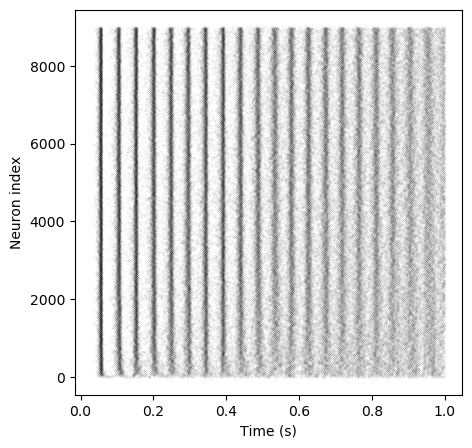

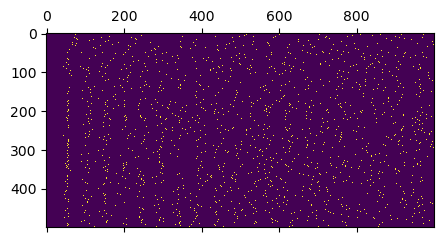

doing time step 0of1000for fish 
doing time step 100of1000for fish 
doing time step 200of1000for fish 
doing time step 300of1000for fish 
doing time step 400of1000for fish 
doing time step 500of1000for fish 
doing time step 600of1000for fish 
doing time step 700of1000for fish 
doing time step 800of1000for fish 
doing time step 900of1000for fish 


WARNING    /Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]
 [py.warnings]


<synapses_1.w: array([0.1       , 0.10000002, 0.10000142, ..., 0.13273919, 0.10049642,
       0.1       ])>


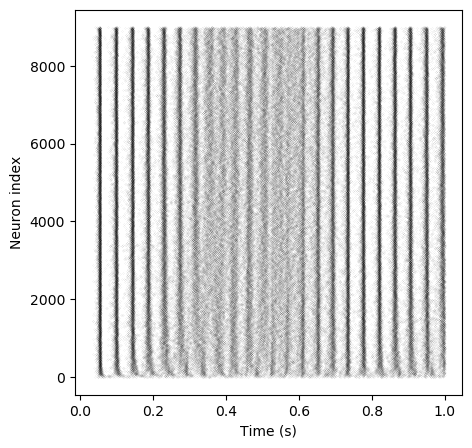

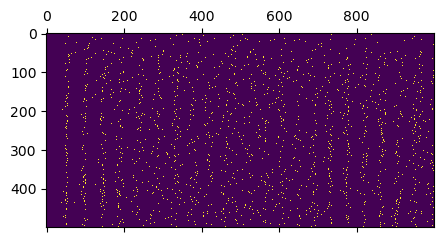

doing time step 0of1000for fish 
doing time step 100of1000for fish 
doing time step 200of1000for fish 
doing time step 300of1000for fish 
doing time step 400of1000for fish 
doing time step 500of1000for fish 
doing time step 600of1000for fish 
doing time step 700of1000for fish 
doing time step 800of1000for fish 
doing time step 900of1000for fish 


WARNING    /Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]
 [py.warnings]


<synapses_2.w: array([0.10611221, 0.11253534, 0.12208102, ..., 0.11741082, 0.10650693,
       0.14466276])>


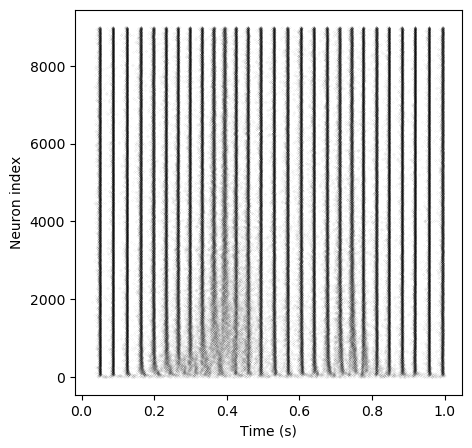

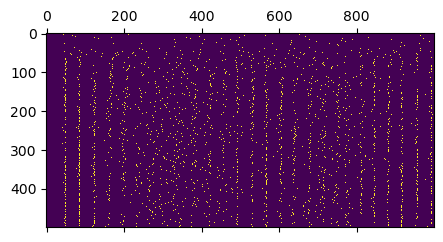

doing time step 0of1000for fish 
doing time step 100of1000for fish 
doing time step 200of1000for fish 
doing time step 300of1000for fish 
doing time step 400of1000for fish 
doing time step 500of1000for fish 
doing time step 600of1000for fish 
doing time step 700of1000for fish 
doing time step 800of1000for fish 
doing time step 900of1000for fish 


WARNING    /Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]
 [py.warnings]


<synapses_1.w: array([0.16850618, 0.17549984, 0.18151221, ..., 0.1798652 , 0.18920956,
       0.17734655])>


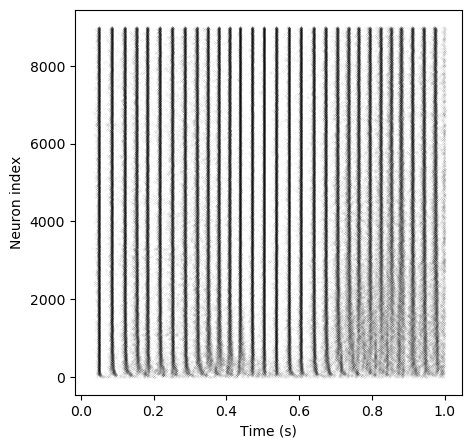

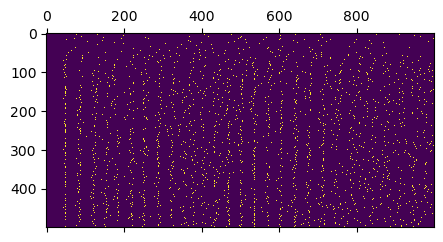

doing time step 0of1000for fish 
doing time step 100of1000for fish 
doing time step 200of1000for fish 
doing time step 300of1000for fish 
doing time step 400of1000for fish 
doing time step 500of1000for fish 
doing time step 600of1000for fish 
doing time step 700of1000for fish 
doing time step 800of1000for fish 
doing time step 900of1000for fish 


WARNING    /Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]
 [py.warnings]


<synapses_2.w: array([0.19813444, 0.19861053, 0.19898743, ..., 0.19962682, 0.19825349,
       0.19858254])>


In [324]:
sim_time=1000 #ms - 10 time steps per ms
b2.start_scope()

#Parameters
k = 50
s = 1 
v_th = 20


r_vals = [0, 2, 4, 7]
r_list = list(range(len(r_vals)))
count=0

for i in (r_vals):

    sim_time=1000 #ms - 10 time steps per ms
    b2.start_scope()
    
    # define dynamics for each cell
    lif ="""
        dv/dt = -(v-v_rest) / tau_l : 1 """
    net_dyn = b2.NeuronGroup(
        N, model=lif,
        threshold="v>v_th", reset="v = v_rest",
        method="euler")
    net_dyn.v = v_rest #set starting value for voltage

    p_input = b2.PoissonInput(net_dyn, "v", N_e,lam, w_e)

    #Network connectivity + weights

    curr = netfn.ba_netsim(dist).adjmat_generate(k, s, i, divisor, soften, 'directed')
    A = curr.A
    W = curr.adj_mat

    #Build synapses
    net_syn = b2.Synapses(net_dyn, net_dyn, 'w:1', on_pre="v+=w", delay=t_syn_del)
    rows, cols = np.nonzero(A)
    net_syn.connect(i = rows, j = cols)
    net_syn.w = W[rows, cols]

    spike_monitor = b2.SpikeMonitor(net_dyn)
    V = b2.StateMonitor(net_dyn, 'v', record=True)
    b2.run(sim_time*b2.ms)
    spikes = spike_monitor.spike_trains()
    volt = np.asarray(V.v)

    #Plot data
    fig, axarr = plt.subplots(figsize = (5,5))
    plt.plot(spike_monitor.t, spike_monitor.i, '.k', markersize = 0.05)
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron index');
    plt.show()

    bind = bin_data(spikes, N, sim_time)
    fig, ax = plt.subplots(figsize= (5,15))
    ax.matshow(bind[:500])
    plt.show()
    r_list[count] = crfn.avalanche_r(net_nnb, bind)
    count+=1
    print(net_syn.w)


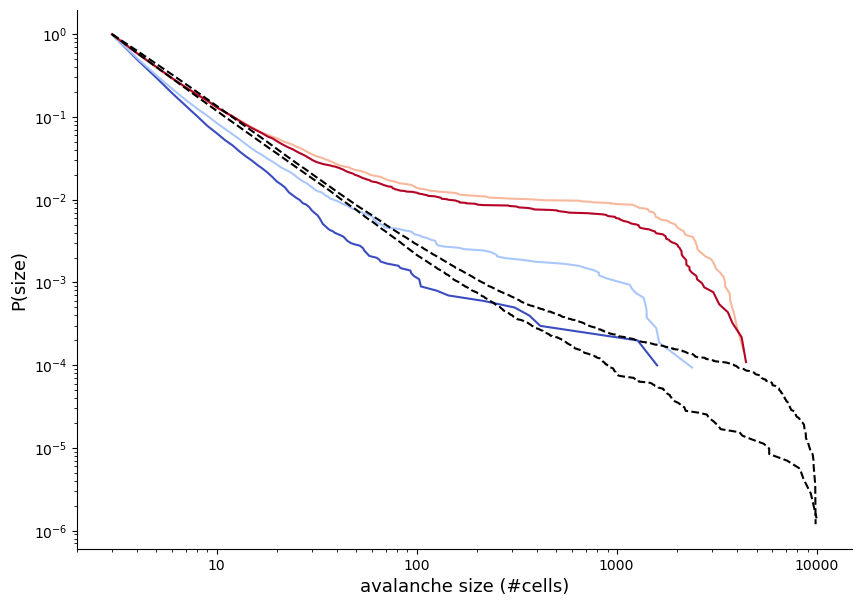

In [325]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
import matplotlib
import powerlaw

colors  = cm.coolwarm(np.linspace(0,1,len(r_list)))
fig, axarr = plt.subplots(figsize = (10,7))
sns.reset_orig()

for i in range(len(r_list)):
    avdistcut = r_list[i][0]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i]) 
    
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')


axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Fit parameters
* Range that captures upper + lower bound of empirical data
* k = 5 - 40 edges
* s = 0 - 7; divisor - 5, soften - 0.07
* c = 0.001 - 1

In [ ]:
ok = crfn.avalanche_r(net_nnb, bind)

In [ ]:
#KS distance

from scipy.optimize import minimize
from scipy.optimize import brute
from scipy import stats
total_list = []
def ks_dist(params):
    print(params)  # <-- you'll see that params is a NumPy array
    s, k  = params # <-- for readability you may wish to assign names to the component variables
    avs = netfn.ba_netsim(dist).simulate(s, int(k), 0.6,  divisor, soften, cutoff, n_sims, 1).av_size
    ks = stats.ks_2samp(empirical, avs)[0]
    total_list.append([params, ks, avs])
    print('ks = ' + str(ks))
    return ks

#Define params
empirical = empirical
dist = dist
initial_guess = [s0, k0]
bnds = ( (0,5), (10, 100))
result = minimize(ks_dist, initial_guess, bounds = bnds, method = 'BFGS')


In [ ]:
#gradient descent - no regularisation - ba net
from scipy.optimize import minimize
from scipy import stats
total_list = []
def euc_dist(params):
    print(params)  # <-- you'll see that params is a NumPy array
    s, k  = params # <-- for readability you may wish to assign names to the component variables
    avs = netfn.ba_netsim(dist).simulate(s, int(k), divisor, soften, cutoff, n_sims).av_size
    binvec = np.append(empirical,avs)
    mini = np.min(binvec)
    maxi = np.max(binvec)
    bins = 1000000
    model_hist = axarr.hist(avs, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    model_xaxis = np.log10(model_hist[1])
    model_yaxis = np.log10(model_hist[0])
    
    emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    emp_xaxis = np.log10(emp_hist[1])
    emp_yaxis = np.log10(emp_hist[0])
    xstop = np.where(model_yaxis == float("-inf"))[0][0]
    cost = np.linalg.norm(emp_yaxis[:xstop] - model_yaxis[:xstop])
    total_list.append([params, cost, avs])
    print('cost = ' + str(cost))
    return cost

#Define params
empirical = bln_vec
dist = dist
initial_guess = [s0, k0]
bnds = ((0,10), (5, 300))
result = minimize(euc_dist, initial_guess, bounds = bnds, method = 'Powell')

In [ ]:
#Regularisation parameter

lamb = 0.01
xstop = np.where(model_yaxis == float("-inf"))[0][0]
reg = lamb*(len(model_yaxis) - xstop)/10 #regularisation parameter - penalise for having empty bins in tail of dist
cost = np.linalg.norm(emp_yaxis[:xstop] - model_yaxis[:xstop]) #+ reg

In [ ]:
#Correlation

from scipy.stats.stats import pearsonr
from scipy.optimize import minimize
from scipy import stats
total_list = []
def corr_dist(params):
    print(params)  # <-- you'll see that params is a NumPy array
    s, k  = params # <-- for readability you may wish to assign names to the component variables
    avs = netfn.ba_netsim(dist).simulate(s, int(k), divisor, soften, cutoff, n_sims, 1).av_size
    binvec = np.append(empirical, np.append(empirical,avs))
    mini = np.min(binvec)
    maxi = np.max(binvec)
    bins = 1000000
    model_hist = axarr.hist(avs, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    model_xaxis = np.log10(model_hist[1])
    model_yaxis = np.log10(model_hist[0])
    
    emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    emp_xaxis = np.log10(emp_hist[1])
    emp_yaxis = np.log10(emp_hist[0])

    
    if float("-inf") in model_yaxis:
        xstop = np.where(model_yaxis == float("-inf"))[0][0]
        cost = 1 - pearsonr(emp_yaxis[:xstop], model_yaxis[:xstop])[0] #+ reg
        
    else:
        cost = 1 - pearsonr(emp_yaxis, model_yaxis)[0] #+ reg
        
        
    total_list.append([params, cost, avs])
    print('cost = ' + str(cost))
    return cost


#Define params
empirical = bln_vec
dist = dist
initial_guess = [s0, k0]
bnds = ((0,5), (20, 200))
result = minimize(corr_dist, initial_guess, bounds = bnds, method = 'Powell')

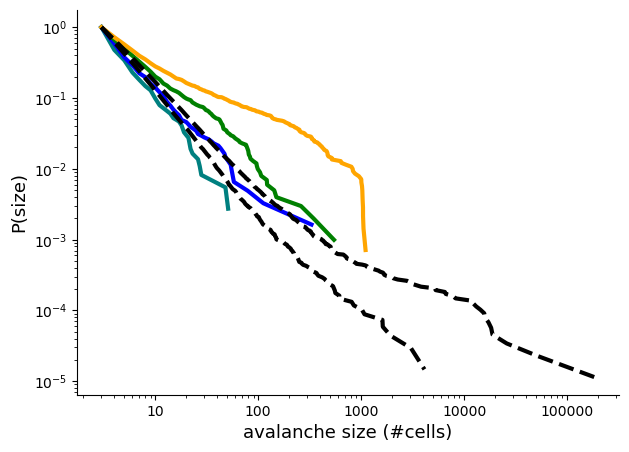

In [331]:
#Upper bound of k
curr = netfn.ba_netsim(dist).simulate(11, 2, 0, divisor, soften, cutoff, n_sims, 1).av_size
curr1 = netfn.ba_netsim(dist).simulate(11, 3, 0,  divisor, soften, cutoff, n_sims, 1).av_size
curr2 = netfn.ba_netsim(dist).simulate(11, 4, 0, divisor, soften, cutoff, n_sims, 1).av_size
curr3 = netfn.ba_netsim(dist).simulate(11, 5, 0, divisor, soften, cutoff, n_sims, 1).av_size


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     
import scipy
os.chdir(F10t + 'Project/' + experiment)


#Cycle length - small network
import matplotlib
import powerlaw

fig, axarr = plt.subplots(figsize = (7,5)) 
sns.reset_orig()
                   
# Node coordinates
#---------------------------------------------------------------------------

avdistcut = curr
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'teal')
avdistcut = curr1
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'blue')
avdistcut = curr2
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'green')
avdistcut = curr3
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'orange')

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
        
        
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Effect of individual parameters
* Bayesian approach - which singular parameter change best explains shift during seizures

In [ ]:
#=====================================
def sample(self, seq, m):
#=====================================
    """ Return m unique elements from seq.
    """
    import random
    import numpy as np

    #make targets a set - only contains unique elements
    targets=set()
    while len(targets)<m:
        x=random.choice(seq)
        targets.add(x) #add method only adds if x is not already in target set
    return np.array(list(targets))


#=====================================
def net_generate(self, edge_density):
#=====================================
    """
    Generate Barabasi-Albert preferential attachment network. BA model starts with k initial nodes, and k edges 
    - each new node will connect to k nodes with p(number of edges already connected to each node). 

        edge_density = number of edges of each node

    """

    import numpy as np
    import networkx as nx
    import random
    import copy

    self.A = np.zeros(self.dist.shape) #initialise graph

    current_n = edge_density #current number of nodes

    # Nodes to connect to from current node
    nodes_out =list(range(edge_density))

    # Sequence of all nodes connected (in and out) - can sample from this 
    node_counts=[]

    #iterate until number of nodes = n
    while current_n < self.dist.shape[0]:
        self.A[current_n, nodes_out] = 1
        self.A[nodes_out, current_n] = 1 

        #add current nodes receiving outgoing connections to node sequence
        node_counts.extend(nodes_out)

        #list of incoming connections for current node - i.e. repeated sequence of current node
        nodes_in = [current_n]*edge_density

        #add current node (as many times as it sends out connections - assumes undirected network) to node sequence
        node_counts.extend(nodes_in)

        #update nodes_out - uniformly sample from sequence of node_counts
        nodes_out = self.sample(node_counts, edge_density)

        current_n +=1
    return(self)

In [ ]:
A = np.zeros(dist.shape) #initialise graph

current_n = edge_density #current number of nodes

# Nodes to connect to from current node
nodes_out =list(range(edge_density))

# Sequence of all nodes connected (in and out) - can sample from this 
node_counts=[]


           

#iterate until number of nodes = n
while current_n < dist.shape[0]:
    A[current_n, nodes_out] = 1
    A[nodes_out, current_n] = 1 

    #add current nodes receiving outgoing connections to node sequence
    node_counts.extend(nodes_out)

    #list of incoming connections for current node - i.e. repeated sequence of current node
    nodes_in = [current_n]*edge_density

    #add current node (as many times as it sends out connections - assumes undirected network) to node sequence
    node_counts.extend(nodes_in)

    #update nodes_out - uniformly sample from sequence of node_counts
    nodes_out = sample(node_counts, edge_density)

    current_n +=1


In [ ]:


# Add m initial nodes (m0 in barabasi-speak)
G=empty_graph(m)
G.name="barabasi_albert_graph(%s,%s)"%(n,m)


# Target nodes for new edges
targets=list(range(m))
# List of existing nodes, with nodes repeated once for each adjacent edge
repeated_nodes=[]
# Start adding the other n-m nodes. The first node is m.
source=m


while source<n:
    # Add edges to m nodes from the source.
    G.add_edges_from(zip([source]*m,targets))
    # Add one node to the list for each new edge just created.
    repeated_nodes.extend(targets)
    # And the new node "source" has m edges to add to the list.
    repeated_nodes.extend([source]*m)
    # Now choose m unique nodes from the existing nodes
    # Pick uniformly from repeated_nodes (preferential attachement)
    targets = _random_subset(repeated_nodes,m)
    source += 1
return G

In [18]:
edge_density = m
A = np.zeros(dist.shape) #initialise graph
current_n = edge_density #current number of nodes

# Nodes to connect to from current node
nodes_out =list(range(edge_density))

# Sequence of all nodes connected (in and out) - can sample from this 
node_counts=[]


In [22]:
nodes_out

[0, 1, 2, 3]

In [23]:
node_counts

[]

In [12]:
import networkx
m = 4
G=nx.empty_graph(m) # add m initial nodes (m0 in barabasi-speak)
repeated_nodes=G.nodes()  # list of existing nodes to sample from with nodes repeated once for each adjacent edge
source=m               # next node is m


In [20]:
repeated_nodes

NodeView((0, 1, 2, 3))

In [21]:
source

4

In [ ]:
#Add first node
G=empty_graph(m) # add m initial nodes (m0 in barabasi-speak)
repeated_nodes=G.nodes()  # list of existing nodes to sample from with nodes repeated once for each adjacent edge
source=m               # next node is m


#Add the other n-1 nodes
while source<n:        
    
    possible_targets = _random_subset(repeated_nodes,m)
    
    #do preferential attachment of first edge for current node 
    target=possible_targets.pop()
    G.add_edge(source,target)
    repeated_nodes.append(target) # add one node to list for each new link
    count=1
    
    #add m-1 more edges for current node
    while count<m:  
        if random.random()<p: # clustering step: add triangle
            neighborhood=[nbr for nbr in G.neighbors(target) \
                           if not G.has_edge(source,nbr) \
                           and not nbr==source]
            
            if neighborhood: # if there is a neighbor without a link
                nbr=random.choice(neighborhood)
                G.add_edge(source,nbr) # add triangle
                repeated_nodes.append(nbr)
                count=count+1
                continue # go to top of while loop
                
        # else do preferential attachment step if above fails
        target=possible_targets.pop()
        G.add_edge(source,target)
        repeated_nodes.append(target)
        count=count+1

    repeated_nodes.extend([source]*m)  # add source node to list m times
    source += 1
return G

In [18]:
#=====================
#=====================
class bap_netsim: 
#=====================
#=====================
    """
    Class to build barabasi-albert networks and run avalanche simulations
    dist = distance matrix between all nodes in network
    """

    #========================
    def __init__(self,dist):
    #========================
        import numpy as np
        self.dist = dist
    

    #BUILD NETWORK
    #=================
    #=================
    
    #=====================================
    def sample(self, seq, m):
    #=====================================
        """ Return m unique elements from seq.
        """
        import random
        import numpy as np
        
        #make targets a set - only contains unique elements
        targets=set()
        while len(targets)<m:
            x=random.choice(seq)
            targets.add(x) #add method only adds if x is not already in target set
        return np.array(list(targets))

    
    #=====================================
    def net_generate(self, p, edge_density):
    #=====================================
        """
        Generate Barabasi-Albert preferential attachment network. BA model starts with k initial nodes, and k edges 
        - each new node will connect to k nodes with p(number of edges already connected to each node). 
        
            edge_density = number of edges of each node
            
        """
        
        import numpy as np
        import networkx as nx
        import random
        import copy
        
        prac = nx.powerlaw_cluster_graph(self.dist.shape[0], edge_density, p)
        self.A = nx.to_numpy_array(prac)

        return(self)
    
    
    
    #CALCULATE CYCLES
    #=================
    #=================
    #===========================
    def cycles_calculate(self, edge_density):
    #===========================
        import networkx as nx
        import numpy as np
        
        cyc_mat = self.net_generate(edge_density).A #matrix to calculate cycles
        G = nx.from_numpy_matrix(cyc_mat)
        cyc = nx.algorithms.cycle_basis(G)
        edge =  int(np.sum(cyc_mat))
        self.cycles = len(cyc)
        self.edges = edge
        return(self)
    
    
    #BUILD WEIGHT MATRIX
    #===================
    #===================
    # Simple sigmoid function to 'soften' the exponential
    #===========================
    def sig(self, x):
    #===========================
        import numpy as np
        self.sig_output = 1 / (1+np.exp(-x))
        return(self)
    
    # Conversion from distance to edge weights, scaled (itself exponentially) by s
    #====================================
    def dist2edge(self, distance, divisor, soften, s):
    #===================================
        import numpy as np
        self.edge_weight_out = np.exp(s/5)*self.sig(np.exp(-soften/np.exp(s)*distance)).sig_output/divisor
        return(self)  
    
    #===========================
    def adjmat_generate(self, s, p, edge_density, divisor, soften):
    #===========================
        import numpy as np
        import copy
        mat = np.zeros((self.dist.shape))
        
        curr_mat = self.net_generate(p, edge_density).A #matrix to calculate cycles
        
        [rows, cols]    = np.where(np.triu(curr_mat) == 1) 
        for e in range(len(rows)):
            edge_weight = self.dist2edge(self.dist[rows[e], cols[e]], divisor, soften, s).edge_weight_out
            mat[rows[e], cols[e]] = edge_weight 
            mat[cols[e], rows[e]] = edge_weight
        self.adj_mat = copy.deepcopy(mat)
            
        return(self)
    
    
    
    #SIMULATE AVALANCHES
    #===================
    #===================
    
    #Find cells to propagate
    #=====================================================
    def propagate_neighbours(self, curr_mat, start_node, r_e):
    #=====================================================
        import numpy as np
        self.prop_nodes = []
        nodes = np.where(curr_mat[start_node] > 0) [0]
        weights = curr_mat[start_node][nodes]
        for f in range(len(nodes)):
            if weights[f] > np.random.uniform(0, 1):
                self.prop_nodes = np.append(self.prop_nodes, nodes[f])
                
        if r_e > np.random.uniform(0,1):
            self.prop_nodes = np.append(self.prop_nodes, start_node)
        return(self)

    
    #Simulate 
    #===========================
    def simulate(self,  s, p, edge_density, max_e, divisor, soften, cutoff, n_sims, iterate):
    #===========================
        import numpy as np
        curr_mat = self.adjmat_generate(s, p, edge_density, divisor, soften).adj_mat
        degree = sum(self.A)
        degree_scaled = (max_e/max(degree)) * degree 
        
        


        
        self.av_size = []
        self.av_dur = []
        
        #iterate simulation calculation for less-noisy distribution
        for x in range(iterate):
            
            for i in range(n_sims):
                #Decide start node
                start_node = np.random.uniform(0, curr_mat.shape[0]-1)
                down = int(start_node)
                up= int(start_node)+1
                if np.random.uniform(down, up) >= start_node:
                    start_node = up
                else:
                    start_node = down


                #Initialise avalanche - ping first node
                t_nodes = self.propagate_neighbours(curr_mat, start_node, degree_scaled[start_node]).prop_nodes #Find connected neighbours > threshold
                curr_list = t_nodes
                iterate = 'yes'

                if len(t_nodes) > 1: #must have at least 3 cells to begin avalanche
                    all_nodes = np.append(start_node, t_nodes)
                    timesteps = 1

                    while iterate == 'yes':
                        tplus_nodes = []
                        for z in range(len(curr_list)):
                            #List of all nodes active in next timestep
                            tplus_nodes = np.append(tplus_nodes, self.propagate_neighbours(curr_mat, int(curr_list[z]), degree_scaled[int(curr_list[z])]).prop_nodes)

                        all_nodes = np.append(all_nodes, tplus_nodes)
                        timesteps+=1
                        curr_list = tplus_nodes

                        if len(all_nodes) > cutoff:
                            iterate = 'no'

                        if len(tplus_nodes) == 0: #if no more active cells - stop
                            iterate = 'no'


                    self.av_size = np.append(self.av_size, len(all_nodes)) 
                    self.av_dur = np.append(self.av_dur, timesteps)

                else:
                    continue

        return(self)
    
